<a href="https://colab.research.google.com/github/TrixiePhany/Pyswarm-Optimization/blob/main/pyswarmOpti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=01748d32036c4614f4b3ffd2431ea8d73dbeac26a95e36c5ca5c1df54547b278
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [ ]:
x=wine.data
y=wine.target
features= wine.feature_names
print(len(features))

13


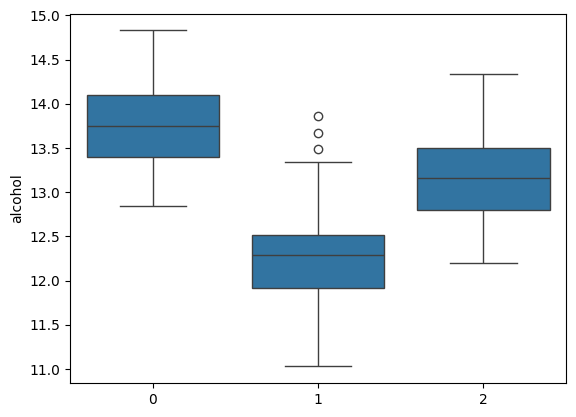

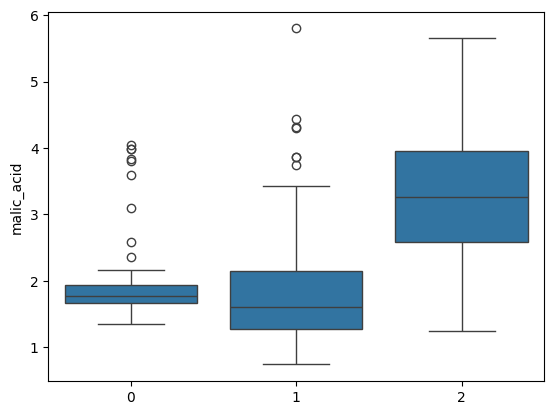

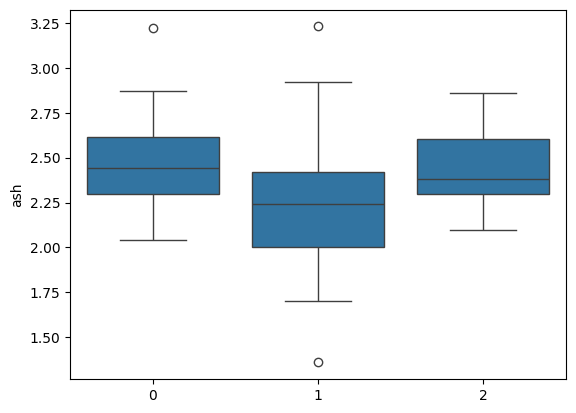

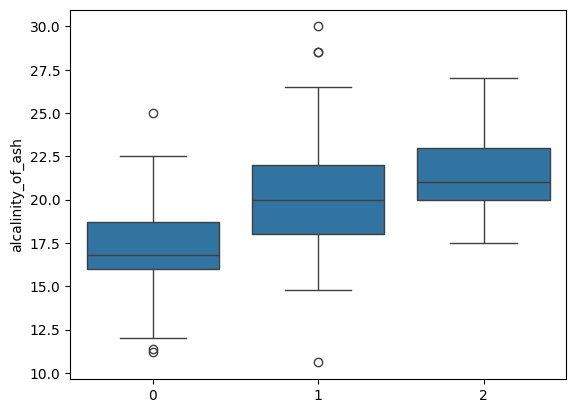

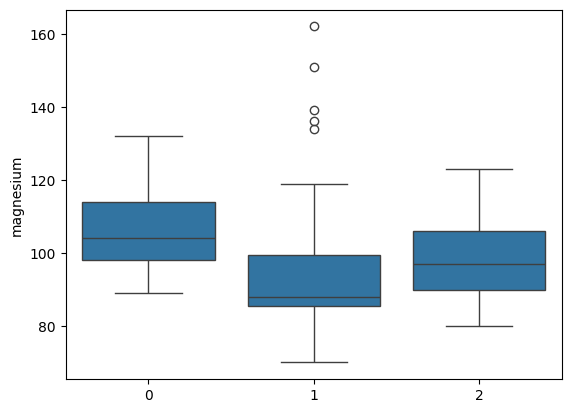

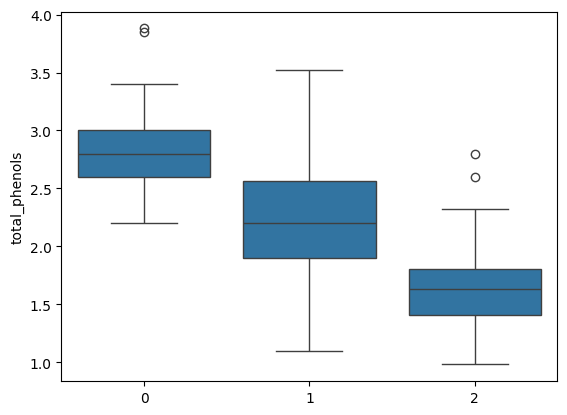

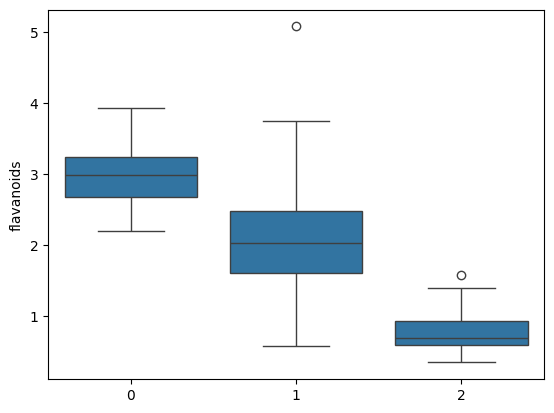

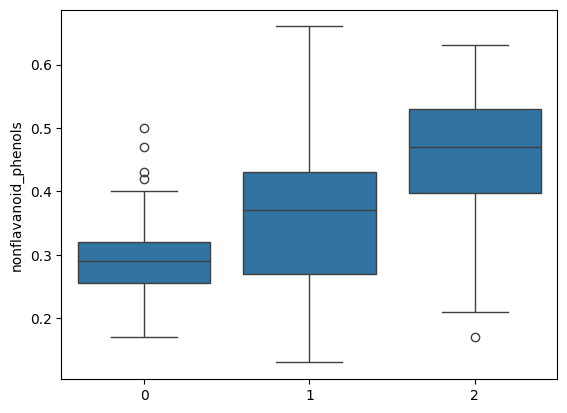

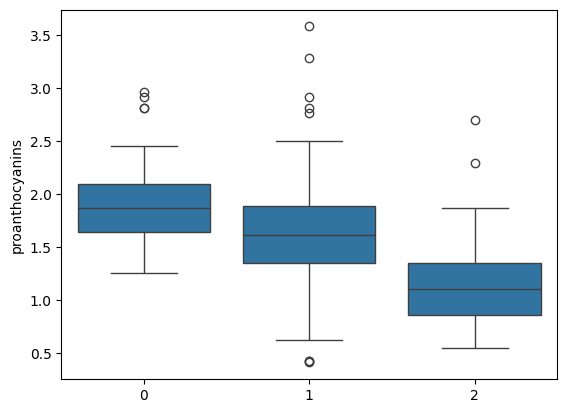

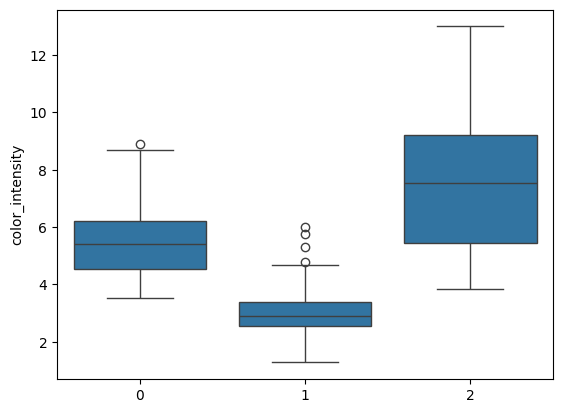

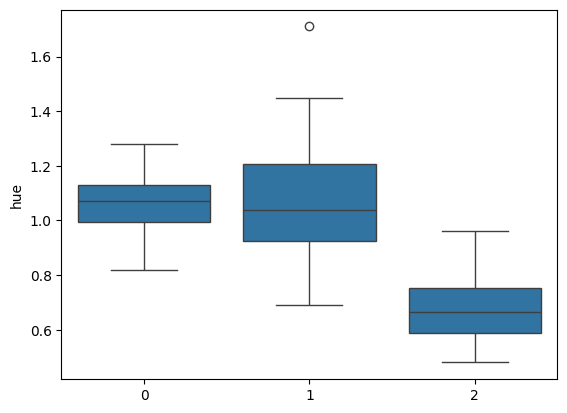

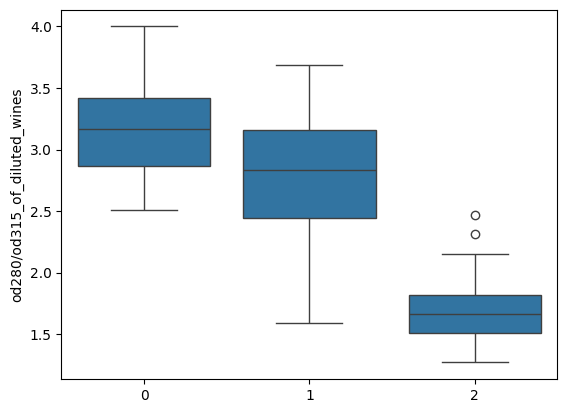

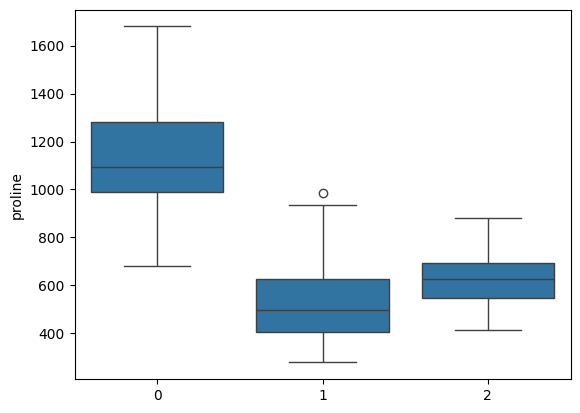

In [ ]:
import seaborn as sns
import  matplotlib.pyplot as plt
for i in range(13):
  sns.boxplot(x=y, y=x[:,i])
  plt.ylabel(features[i])
  plt.show()

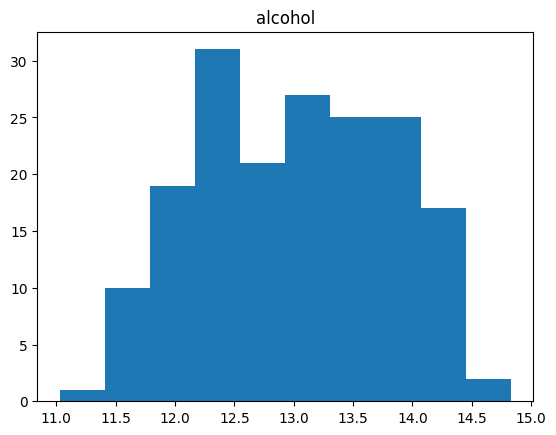

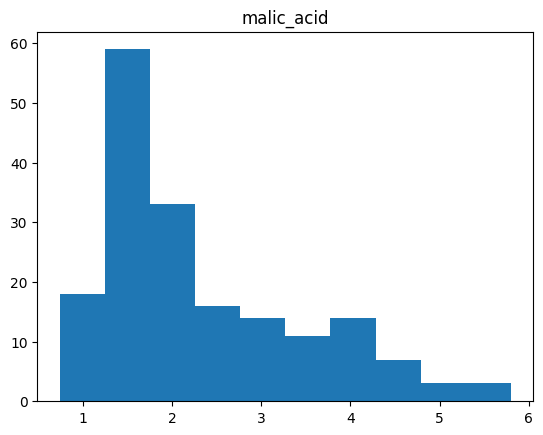

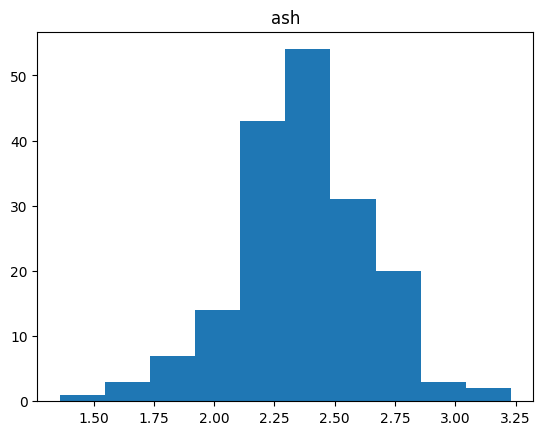

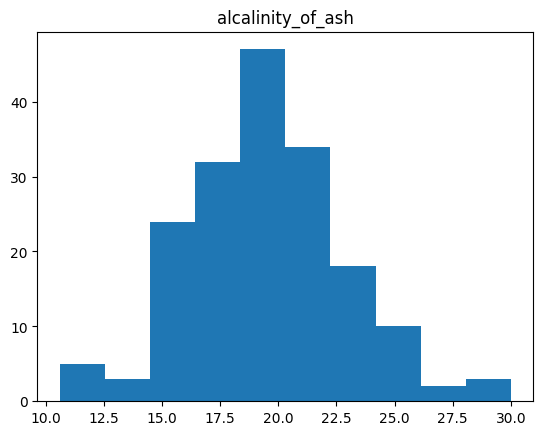

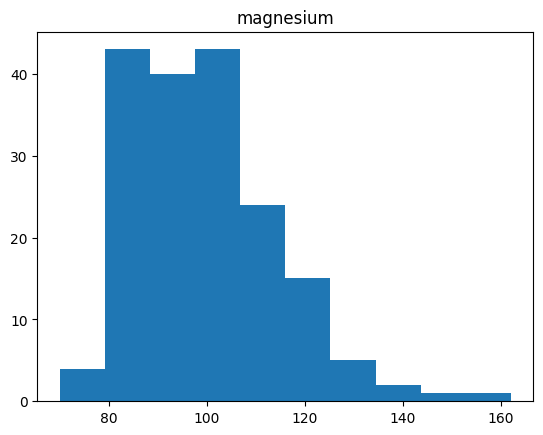

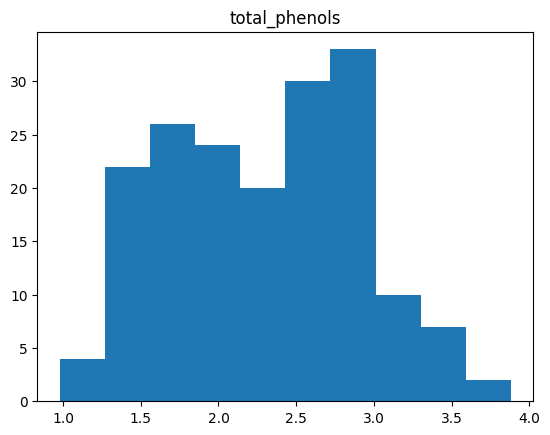

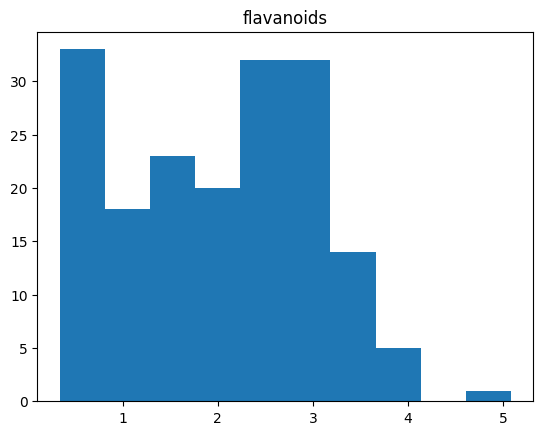

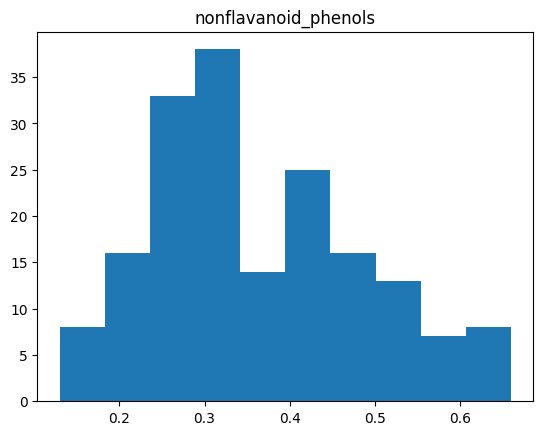

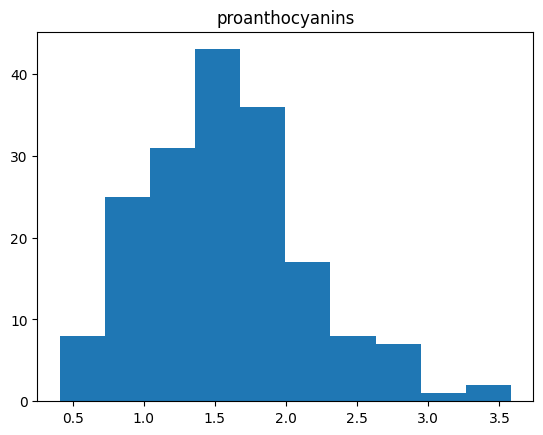

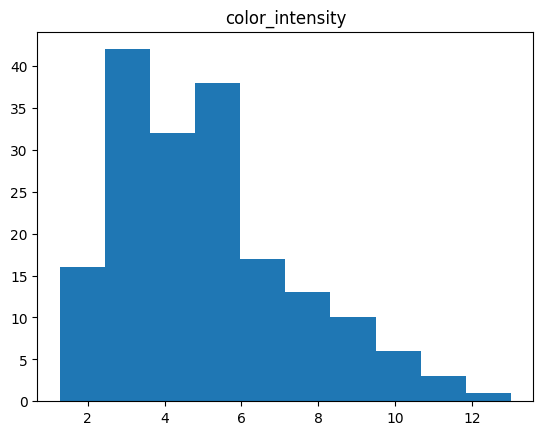

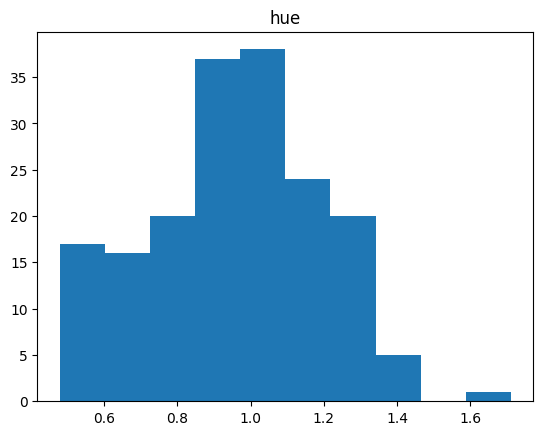

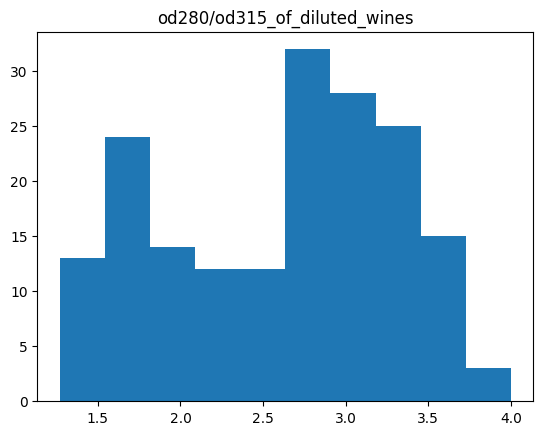

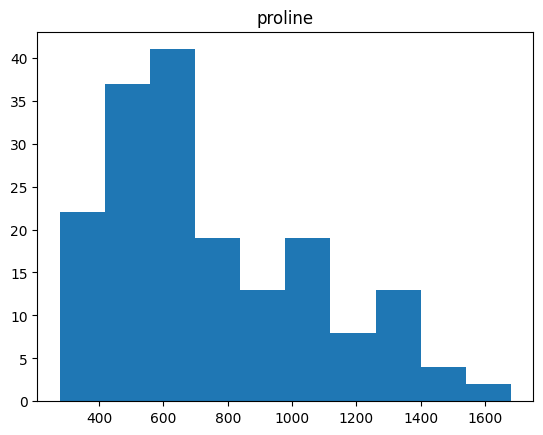

In [ ]:
for i in range(13):
  plt.hist(x[:,i])
  plt.title(features[i])
  plt.show()

In [ ]:
target_name=wine.target_names
print(target_name)

['class_0' 'class_1' 'class_2']


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pyswarm import pso
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)


In [ ]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernel:
  model = SVC(kernel=i, C=1.0) # Changed 'c' to 'C'
  model.fit(x_train, y_train)
  print('For kernel:', i)
  print('Accuracy is:', model.score(x_test,y_test))

For kernel: linear
Accuracy is: 0.9074074074074074
For kernel: poly
Accuracy is: 0.6296296296296297
For kernel: rbf
Accuracy is: 0.6296296296296297
For kernel: sigmoid
Accuracy is: 0.2962962962962963


In [ ]:
model = SVC()
model.fit(x_train, y_train)
print('Accuracy is:', model.score(x_test,y_test))

Accuracy is: 0.6296296296296297


In [ ]:
for i in range(1,10):
  model= SVC(kernel='poly', degree=i,C=100)
  model.fit(x_train, y_train)
  print('Accuracy is: \t', model.score(x_test,y_test))
  print('Accuracy is: \t', model.score(x_train,y_train))

Accuracy is: 	 0.6296296296296297
Accuracy is: 	 0.6935483870967742
Accuracy is: 	 0.6296296296296297
Accuracy is: 	 0.6935483870967742
Accuracy is: 	 0.6296296296296297
Accuracy is: 	 0.6854838709677419
Accuracy is: 	 0.6296296296296297
Accuracy is: 	 0.6854838709677419
Accuracy is: 	 0.6481481481481481
Accuracy is: 	 0.6935483870967742
Accuracy is: 	 0.6481481481481481
Accuracy is: 	 0.7016129032258065
Accuracy is: 	 0.6481481481481481
Accuracy is: 	 0.7016129032258065
Accuracy is: 	 0.6481481481481481
Accuracy is: 	 0.7096774193548387
Accuracy is: 	 0.6481481481481481
Accuracy is: 	 0.7258064516129032


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'degree': [1,2,3,4,5,6]}
grid=GridSearchCV(SVC(), param_grid)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.score(x_test,y_test))

{'C': 1, 'degree': 1, 'kernel': 'linear'}
0.9074074074074074


In [ ]:
kernel_map = {0: 'linear', 1: 'poly', 2: 'rbf', 3: 'sigmoid'}

def svm_objective(params):
    C, kernel, degree = params
    model = SVC(kernel=kernel_map[int(kernel)], C=C, degree=int(degree))
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    return -accuracy  # minimize negative accuracy

#defining the bounds
lb = [0.1, 0, 1]  # lower bounds
ub = [1000, 3, 6]  # upper bounds

xopt, fopt = pso(svm_objective, lb, ub, swarmsize=100, maxiter=100)

print("Optimized hyperparameters:", xopt)
print("Optimal accuracy:", -fopt)

Stopping search: maximum iterations reached --> 100
Optimized hyperparameters: [0.1        0.         5.64231467]
Optimal accuracy: 0.9629629629629629


In [ ]:
model = SVC(kernel=kernel_map[int(xopt[1])], C=xopt[0], degree=int(xopt[2]))
model.fit(x_train, y_train)
print("Test accuracy:", model.score(x_test, y_test))

Test accuracy: 0.9629629629629629
